In [2]:
!pip install Kaggle

In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download samuelcortinhas/muffin-vs-chihuahua-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification
License(s): CC0-1.0
 98% 464M/474M [00:06<00:00, 95.0MB/s]
100% 474M/474M [00:06<00:00, 77.2MB/s]


In [7]:
! unzip muffin-vs-chihuahua-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/muffin/img_2_671.jpg  
  inflating: test/muffin/img_2_681.jpg  
  inflating: test/muffin/img_2_689.jpg  
  inflating: test/muffin/img_2_709.jpg  
  inflating: test/muffin/img_2_721.jpg  
  inflating: test/muffin/img_2_73.jpg  
  inflating: test/muffin/img_2_735.jpg  
  inflating: test/muffin/img_2_752.jpg  
  inflating: test/muffin/img_2_757.jpg  
  inflating: test/muffin/img_2_762.jpg  
  inflating: test/muffin/img_2_767.jpg  
  inflating: test/muffin/img_2_78.jpg  
  inflating: test/muffin/img_2_784.jpg  
  inflating: test/muffin/img_2_799.jpg  
  inflating: test/muffin/img_2_8.jpg  
  inflating: test/muffin/img_2_810.jpg  
  inflating: test/muffin/img_2_819.jpg  
  inflating: test/muffin/img_2_82.jpg  
  inflating: test/muffin/img_2_821.jpg  
  inflating: test/muffin/img_2_824.jpg  
  inflating: test/muffin/img_2_827.jpg  
  inflating: test/muffin/img_2_838.jpg  
  inflating: test/muffin/img_2_857.jpg  
  inflating

In [8]:
# Define paths to the dataset
train_dir = '/content/train'  # Update with your actual path
test_dir = '/content/test'    # Update with your actual path

In [9]:
import os
print(len(os.listdir('/content/train/chihuahua')))
print(len(os.listdir('/content/train/muffin')))
print(len(os.listdir('/content/test/chihuahua')))
print(len(os.listdir('/content/test/muffin')))

2559
2174
640
544


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(255,255),
    batch_size=33,
    class_mode='binary',  # 'binary' for binary classification (chihuahua vs muffin)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(255,255),
    batch_size=33,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 3788 images belonging to 2 classes.
Found 945 images belonging to 2 classes.


In [11]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [12]:
# create CNN model

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [13]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [14]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
115/115 [==============================] - 592s 5s/step - loss: 0.6327 - accuracy: 0.6880 - val_loss: 0.4354 - val_accuracy: 0.8074
Epoch 2/30
115/115 [==============================] - 588s 5s/step - loss: 0.3968 - accuracy: 0.8231 - val_loss: 0.3151 - val_accuracy: 0.8825
Epoch 3/30
115/115 [==============================] - 598s 5s/step - loss: 0.3200 - accuracy: 0.8664 - val_loss: 0.4831 - val_accuracy: 0.7651
Epoch 4/30
115/115 [==============================] - 625s 5s/step - loss: 0.2238 - accuracy: 0.9047 - val_loss: 0.3312 - val_accuracy: 0.8571
Epoch 5/30
115/115 [==============================] - 588s 5s/step - loss: 0.1294 - accuracy: 0.9501 - val_loss: 0.3919 - val_accuracy: 0.8709
Epoch 6/30
115/115 [==============================] - 584s 5s/step - loss: 0.0785 - accuracy: 0.9718 - val_loss: 0.4233 - val_accuracy: 0.8709
Epoch 7/30
115/115 [==============================] - 574s 5s/step - loss: 0.0360 - accuracy: 0.9876 - val_loss: 0.4930 - val_accuracy: 0.8614

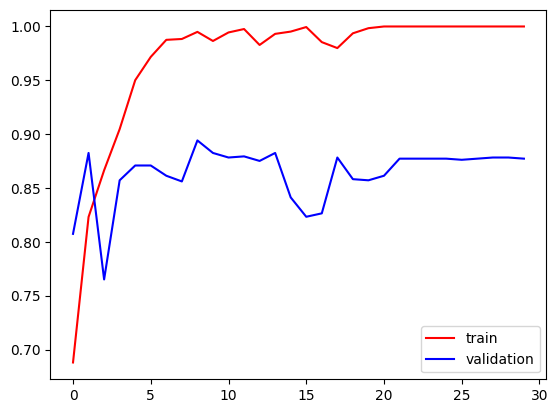

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

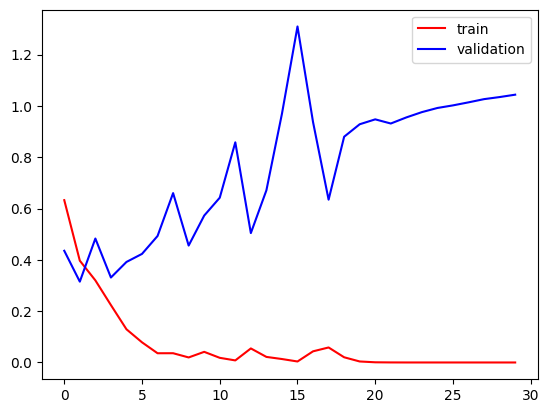

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1184 images belonging to 2 classes.


In [18]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

37/37 [==============================] - 51s 1s/step
[[9.9999028e-01]
 [4.1681575e-13]
 [7.3546602e-04]
 ...
 [6.1736500e-01]
 [7.7684535e-07]
 [1.0000000e+00]]


In [19]:
len(predictions)

1184

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[330 310]
 [294 250]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.52      0.52       640
           1       0.45      0.46      0.45       544

    accuracy                           0.49      1184
   macro avg       0.49      0.49      0.49      1184
weighted avg       0.49      0.49      0.49      1184



In [21]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 0s 0us/step


In [22]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [23]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [24]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
115/115 [==============================] - 1177s 10s/step - loss: 1.0638 - accuracy: 0.6874 - val_loss: 0.5810 - val_accuracy: 0.6984
Epoch 2/3
115/115 [==============================] - 1170s 10s/step - loss: 0.4704 - accuracy: 0.7827 - val_loss: 0.3535 - val_accuracy: 0.8603
Epoch 3/3
115/115 [==============================] - 1154s 10s/step - loss: 0.4306 - accuracy: 0.8083 - val_loss: 0.4356 - val_accuracy: 0.8021


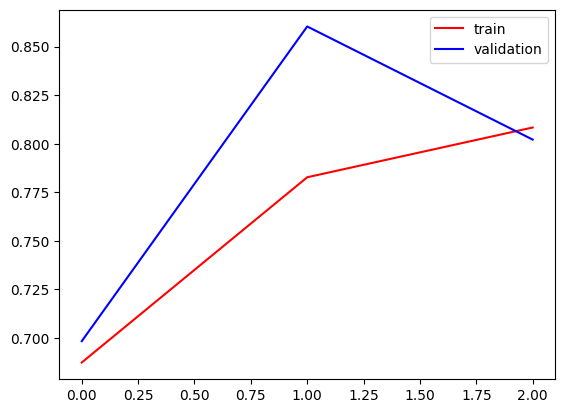

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

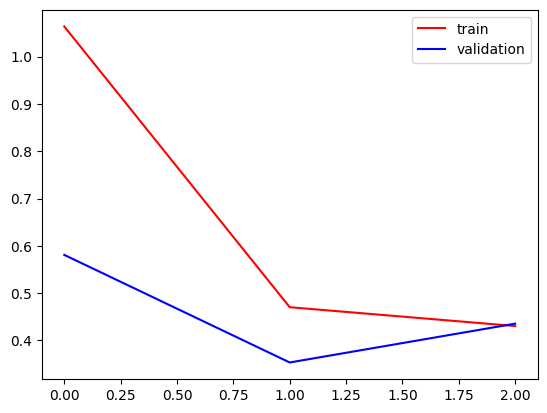

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1184 images belonging to 2 classes.


In [28]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

37/37 [==============================] - 294s 8s/step
[[0.11311406]
 [0.616575  ]
 [0.04490635]
 ...
 [0.5329615 ]
 [0.14429696]
 [0.6237149 ]]


In [29]:
len(predictions)

1184

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[419 221]
 [385 159]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.65      0.58       640
           1       0.42      0.29      0.34       544

    accuracy                           0.49      1184
   macro avg       0.47      0.47      0.46      1184
weighted avg       0.47      0.49      0.47      1184

